In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
# Load the dataset
file_path = 'weatherAUS.csv'
df = pd.read_csv(file_path)

# Display dataset preview and check for missing values
print("Dataset Preview:")
print(df.head())

Dataset Preview:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0

In [10]:
# Checking for missing values
print("\nMissing Values Summary:")
missing_values = df.isnull().sum()
print(missing_values)

# Drop columns with excessive missing values (> 20%)
df = df.dropna(axis=1, thresh=int(0.8 * len(df)))  # Retaining columns with at least 80% non-missing data


# Fill remaining missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # For numeric columns


Missing Values Summary:
Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64


In [12]:
# For categorical columns, fill missing values with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Direct assignment to the column


# Convert categorical variables into numerical ones using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target variable (y)
X = df.drop(columns=['RainTomorrow_Yes'])  # Replace 'RainTomorrow_Yes' with the correct column if necessary
y = df['RainTomorrow_Yes']  # Replace with the target column if necessary

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

C:\Users\Saksham Gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Display evaluation metrics
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Model Accuracy: 0.8402

Confusion Matrix:
[[21503  1169]
 [ 3480  2940]]

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.95      0.90     22672
        True       0.72      0.46      0.56      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



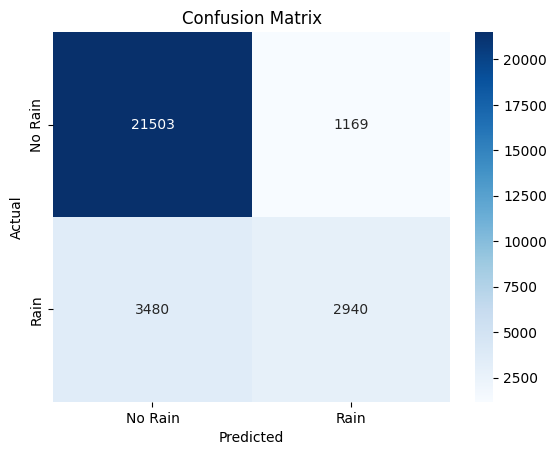

In [16]:
# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()